In [2]:
using Pkg
Pkg.activate("..")

  Activating project at `~/PauliSampling.jl`


In [21]:
# Pkg.develop(url="https://github.com/josheligoldman/F2Algebra.jl.git")
# Pkg.instantiate()

In [14]:
using PauliPropagation
using PauliSampling
using Plots

In [17]:
nq = 5
init_psum = zero_state(nq)
max_weight = min(max(1, nq ÷ 2), 4)
circuit_nq = build_circuit(nq)
nparams = countparameters(circuit_nq)
thetas = randn(nparams) * 0.5
#exact_psum = propagate(circuit_nq, init_psum, thetas)
trunc_psum = propagate(circuit_nq, init_psum, thetas; max_weight=max_weight);

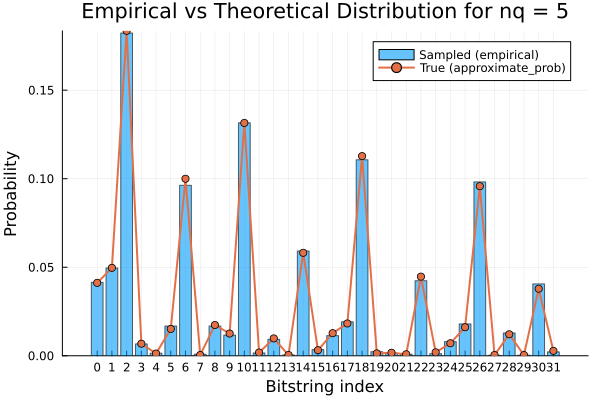

In [18]:
samples = 10000
# Sampling
counts = zeros(Int, 2^nq)

for _ in 1:samples
    bitstring = sample_bitstring(trunc_psum; prob_method=:approx)
    index = foldl((acc, b) -> 2*acc + b, reverse(bitstring), init=0) + 1  # convert BitVector to index (1-based)
    counts[index] += 1
end

empirical_probs = counts ./ samples

# Theoretical distribution
true_probs = PauliSampling.get_dist(trunc_psum, approximate_prob)

# Plot
bar(0:2^nq-1, empirical_probs, label="Sampled (empirical)", legend=:topright, alpha=0.6, xticks=0:2^nq-1)
plot!(0:2^nq-1, true_probs, label="True (approximate_prob)", lw=2, marker=:circle)

xlabel!("Bitstring index")
ylabel!("Probability")
title!("Empirical vs Theoretical Distribution for nq = $nq")

Running nq = 2
Running nq = 3
Running nq = 4
Running nq = 5
Running nq = 6
Running nq = 7
Running nq = 8
Running nq = 9
Running nq = 10
Running nq = 11
Running nq = 12
Running nq = 13


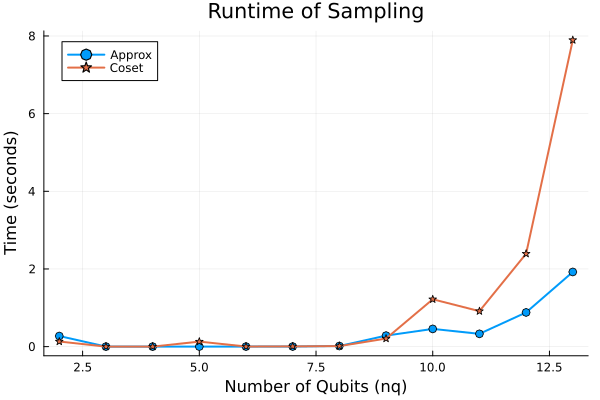

In [20]:
nq_range = 2:13
times_approx = Float64[]
times_coset = Float64[]

for nq in nq_range
    println("Running nq = $nq")
    
    init_psum = zero_state(nq)
    max_weight = min(max(1, nq ÷ 2), 5)
    circuit_nq = build_circuit(nq)
    nparams = countparameters(circuit_nq)
    thetas = randn(nparams) * 0.5

    #exact_psum = propagate(circuit_nq, init_psum, thetas)
    trunc_psum = propagate(circuit_nq, init_psum, thetas; max_weight=max_weight)

    # Time each get_dist call
    t_approx = @elapsed sample_bitstring(trunc_psum; prob_method=:approx)
    t_coset = @elapsed sample_bitstring(trunc_psum; prob_method=:coset)

    push!(times_approx, t_approx)
    push!(times_coset, t_coset)
end

# Plotting
plot(nq_range, times_approx, label="Approx", lw=2, marker=:o)
plot!(nq_range, times_coset, label="Coset", lw=2, marker=:s)
xlabel!("Number of Qubits (nq)")
ylabel!("Time (seconds)")
title!("Runtime of Sampling")

Running nq = 2
Running nq = 3
Running nq = 4
Running nq = 5
Running nq = 6
Running nq = 7
Running nq = 8
Running nq = 9
Running nq = 10


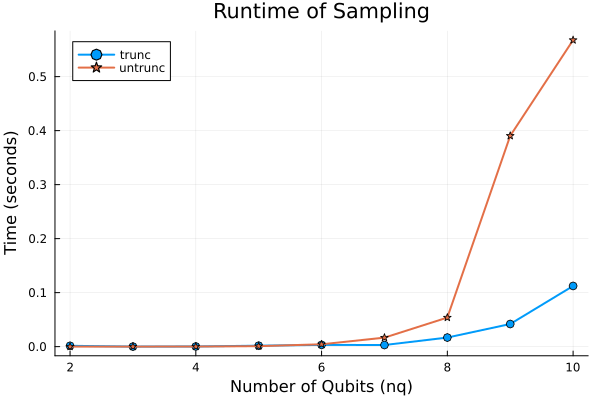

In [24]:
nq_range = 2:10
times_trunc = Float64[]
times_untrunc = Float64[]

for nq in nq_range
    println("Running nq = $nq")
    
    init_psum = zero_state(nq)
    max_weight = min(max(1, nq ÷ 2), 6)
    circuit_nq = build_circuit(nq)
    nparams = countparameters(circuit_nq)
    thetas = randn(nparams) * 0.5

    exact_psum = propagate(circuit_nq, init_psum, thetas)
    trunc_psum = propagate(circuit_nq, init_psum, thetas; max_weight=max_weight)

    # Time each get_dist call
    t_trunc = @elapsed sample_bitstring(trunc_psum; prob_method=:approx)
    t_untrunc = @elapsed sample_bitstring(exact_psum; prob_method=:approx)

    push!(times_trunc, t_trunc)
    push!(times_untrunc, t_untrunc)
end

# Plotting
plot(nq_range, times_trunc, label="trunc", lw=2, marker=:o)
plot!(nq_range, times_untrunc, label="untrunc", lw=2, marker=:s)
xlabel!("Number of Qubits (nq)")
ylabel!("Time (seconds)")
title!("Runtime of Sampling")